In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv("/kaggle/input/interview-selection-dataset/Data - Base.csv")
df.shape

(21256, 52)

In [3]:
# df.info()

In [4]:
# df.isna().sum()

In [5]:
df.columns = df.columns.str.strip()\
    .str.replace(r"[\/\?\*\-\\.,]", "", regex=True)\
    .str.replace(" ", "_")\
    .str.lower()

In [6]:
df.columns

Index(['name', 'age', 'gender', 'type_of_graduationpost_graduation',
       'marital_status', 'mode_of_interview_given_by_candidate',
       'pre_interview_check', 'fluency_in_english_based_on_introduction',
       'confidence_based_on_introduction_(english)',
       'confidence_based_on_the_topic_given',
       'confidence_based_on_the_ppt_question',
       'confidence_based_on_the_sales_scenario',
       'structured_thinking_(in_regional_only)',
       'structured_thinking_based_on_the_ppt_question',
       'structured_thinking(_call_pitch)',
       'regional_fluency_based_on_the_topic_given',
       'regional_fluency_based_on_the_ppt_question',
       'regional_fluency_based_on_the__sales_scenario',
       'does_the_candidate_has_mother_tongue_influence_while_speaking_english',
       'has_acquaintance_in_company_and_has_spoken_to_himher_before_applying',
       'candidate_status', 'last_fixed_ctc_(lakhs)', 'currently_employed',
       'experienced_candidate__(experience_in_months)'

In [7]:
df.rename(columns={'does_the_candidate_has_mother_tongue_influence_while_speaking_english': 'mother_tongue_influence',
                   'has_acquaintance_in_company_and_has_spoken_to_himher_before_applying' : 'has_acquaintance_in_company',
                   "but_my_child's_exam_are_going_on_now_so_we_will_keep_the_counselling_session_after_the_exams_get_over(time:_favourable_pitch:_counsellor_hype)" : "father_reply",
                   "sir_being_in_education_industry_i_know_this_is_a_marketing_gimmick_and_at_the_end_of_the_day_you'll_be_selling_the_app": "being_in_education_industry_be_selling_the_app",
                  }, inplace=True)

In [8]:
# df.info()

In [9]:
df.shape

(21256, 52)

In [10]:
df = df.drop(columns=['name', 'whether_joined_the_company_or_not'])
df.shape

(21256, 50)

In [11]:
df.head()

,age,gender,type_of_graduationpost_graduation,marital_status,mode_of_interview_given_by_candidate,pre_interview_check,fluency_in_english_based_on_introduction,confidence_based_on_introduction_(english),confidence_based_on_the_topic_given,confidence_based_on_the_ppt_question,...,structured_thinking_(in_regional_only)1,structured_thinking_based_on_the_ppt_question1,structured_thinking(_call_pitch)1,regional_fluency_based_on_the_topic_given__1,regional_fluency_based_on_the_ppt_question1,regional_fluency_based_on_the__sales_scenario1,confidence_score,structured_thinking_score,regional_fluency_score,total_score
0,25,Female,Masters in data science,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,...,2,3,2,1,1.0,1.0,11,7,3,42
1,29,Female,BSc or MSc,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,...,3,3,3,3,3.0,3.0,12,9,9,60
2,27,Female,B.E / B-Tech,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,...,3,3,3,3,1.0,3.0,10,9,7,52
3,22,Male,B.E / B-Tech,Unmarried,Laptop,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,...,3,3,3,3,3.0,3.0,12,9,9,60
4,22,Male,BA/MA,Unmarried,Mobile,Proceed with the Interview,Taking gaps while speaking due to lack of cont...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,...,2,2,1,3,1.0,3.0,10,5,7,44


In [12]:
columns_to_drop = df.columns[7:17]
print("Dropping the following columns:")
print(columns_to_drop)

Dropping the following columns:
Index(['confidence_based_on_introduction_(english)',
       'confidence_based_on_the_topic_given',
       'confidence_based_on_the_ppt_question',
       'confidence_based_on_the_sales_scenario',
       'structured_thinking_(in_regional_only)',
       'structured_thinking_based_on_the_ppt_question',
       'structured_thinking(_call_pitch)',
       'regional_fluency_based_on_the_topic_given',
       'regional_fluency_based_on_the_ppt_question',
       'regional_fluency_based_on_the__sales_scenario'],
      dtype='object')


In [13]:
# Dropping the columns
df = df.drop(columns=columns_to_drop)
df.shape

(21256, 40)

In [14]:
df.duplicated().sum()

355

In [15]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [16]:
df.shape

(20901, 40)

In [17]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [18]:
df.shape

(18681, 40)

In [19]:
df.duplicated().sum()

0

In [20]:
# df.isna().sum()

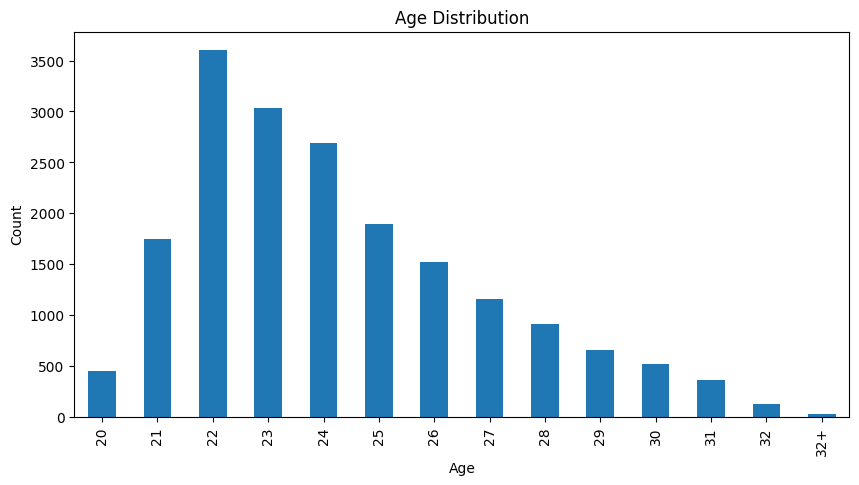

In [21]:
df['age'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

In [22]:
# Convert to int
df['age'] = df['age'].replace('32+', '32').astype(int)

In [23]:
bins = [0, 19, 21, 24, 27, 30, 32, float('inf')]
labels = ['0-19', '20-21', '22-24', '25-27', '28-30', '31-60', '60+']
df['age'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

In [24]:
df['age'].unique()

['25-27', '28-30', '22-24', '20-21', '31-60']
Categories (7, object): ['0-19' < '20-21' < '22-24' < '25-27' < '28-30' < '31-60' < '60+']

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


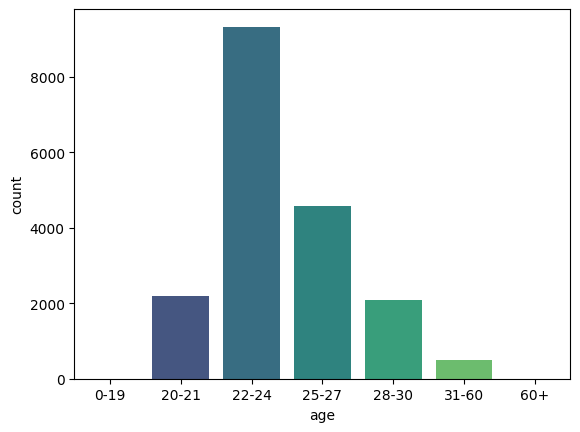

In [25]:
sns.countplot(x=df['age'], palette="viridis", order=labels)
plt.show()

In [26]:
df['age'] = df['age'].cat.codes

In [27]:
df['age'].unique()

array([3, 4, 2, 1, 5], dtype=int8)

In [28]:
df['type_of_graduationpost_graduation'] = df['type_of_graduationpost_graduation'].str.lower() #-------------------------------------------------------------------------------

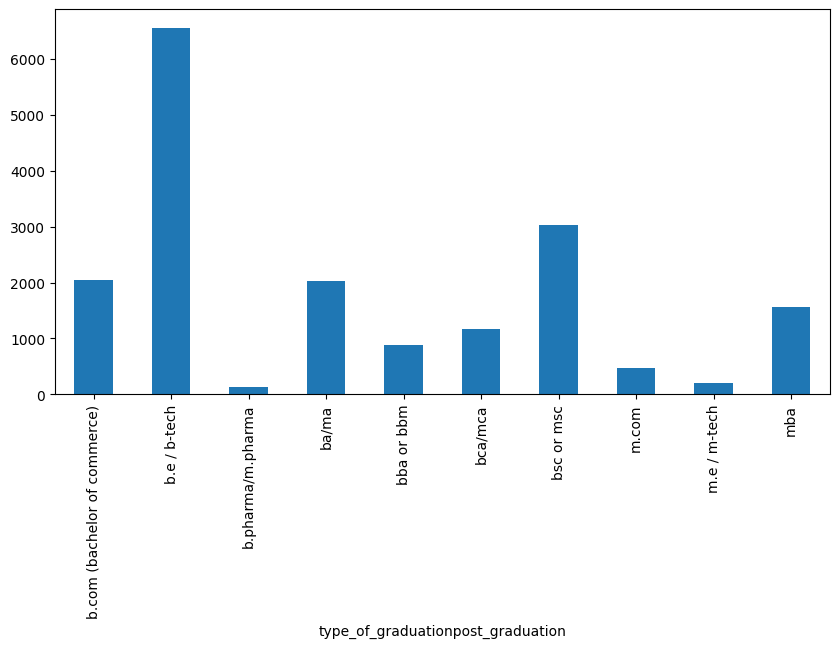

In [29]:
df['type_of_graduationpost_graduation'].value_counts().head(10).sort_index().plot(kind='bar', figsize=(10,5))
plt.show()

In [30]:
# df['type_of_graduationpost_graduation'].unique()

In [31]:
df["type_of_graduationpost_graduation"].value_counts().head(20)

type_of_graduationpost_graduation
b.e / b-tech                       6551
bsc or msc                         3019
b.com (bachelor of commerce)       2044
ba/ma                              2033
mba                                1571
bca/mca                            1166
bba or bbm                          879
m.com                               468
m.e / m-tech                        211
b.pharma/m.pharma                   141
b.ed(teaching)                      137
hotel management                     69
b.comm (bachelor of mass comm.)      68
pgdm                                 43
bms                                  16
pgdca                                13
msw                                  12
bvoc                                  9
bcom computers                        6
bcs                                   5
Name: count, dtype: int64

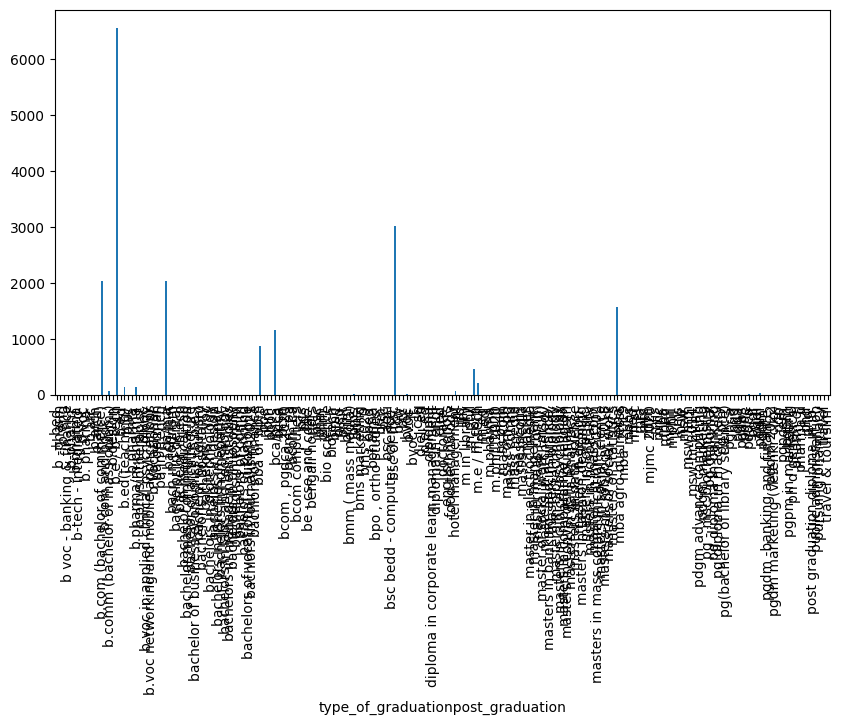

In [32]:
df['type_of_graduationpost_graduation'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.show()

In [33]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [34]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [35]:
df = pd.get_dummies(df, columns=['marital_status'])

In [36]:
df['mode_of_interview_given_by_candidate'].value_counts()

mode_of_interview_given_by_candidate
Mobile    14039
Laptop     4642
Name: count, dtype: int64

In [37]:
df = pd.get_dummies(df, columns=['mode_of_interview_given_by_candidate'])

In [38]:
df['pre_interview_check'].value_counts()

pre_interview_check
Proceed with the Interview    18678
Option 4                          2
I                                 1
Name: count, dtype: int64

In [39]:
df.drop(columns=['pre_interview_check'], inplace=True)

In [40]:
df['fluency_in_english_based_on_introduction'].unique()

array(['Able to speak sentences in a clear/coherent way. Smooth talker with one or two hiccups.',
       'Taking gaps while speaking due to lack of content but does not stammer or stutter',
       'Trying but Not Able to speak clearly & Fumbles a lot',
       'Natural Stutter and Stammer'], dtype=object)

In [41]:
# Define ordinal mapping
fluency_mapping = {
    'Trying but Not Able to speak clearly & Fumbles a lot': 0,
    'Taking gaps while speaking due to lack of content but does not stammer or stutter': 1,
    'Natural Stutter and Stammer': 2,
    'Able to speak sentences in a clear/coherent way. Smooth talker with one or two hiccups.': 3
}

# Apply mapping
df['fluency_in_english_based_on_introduction'] = df['fluency_in_english_based_on_introduction'].map(fluency_mapping)

In [42]:
df['fluency_in_english_based_on_introduction'].unique()

array([3, 1, 0, 2])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18681 entries, 0 to 18680
Data columns (total 42 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   age                                                     18681 non-null  int8   
 1   gender                                                  18681 non-null  int64  
 2   type_of_graduationpost_graduation                       18681 non-null  object 
 3   fluency_in_english_based_on_introduction                18681 non-null  int64  
 4   mother_tongue_influence                                 18681 non-null  object 
 5   has_acquaintance_in_company                             18681 non-null  object 
 6   candidate_status                                        18681 non-null  object 
 7   last_fixed_ctc_(lakhs)                                  18681 non-null  object 
 8   currently_employed                  

In [44]:
df['mother_tongue_influence'].unique()

array(['No', 'Yes'], dtype=object)

In [45]:
df['mother_tongue_influence'] = df['mother_tongue_influence'].map({'No':0, 'Yes':1})

In [46]:
df['has_acquaintance_in_company'].unique()

array(['No', 'Yes'], dtype=object)

In [47]:
df['has_acquaintance_in_company'] = df['has_acquaintance_in_company'].map({'Yes': 1, 'No': 0})
df['has_acquaintance_in_company'].unique()

array([0, 1])

In [48]:
df['candidate_status'].value_counts()

candidate_status
Fresher(only 2022 grad)                                             8591
Lateral(2021 and before with (less than 6 months) experience)       3639
Experienced in client facing(equal to or more than 6 months)        3429
Experienced in non client facing(equal to or more than 6 months)    3022
Name: count, dtype: int64

In [49]:
df = pd.get_dummies(df, columns=['candidate_status'])

In [50]:
df.shape

(18681, 45)

In [51]:
df['last_fixed_ctc_(lakhs)'].unique()

array(['5-5.99', 'Fresher', '2-2.99', '3-3.99', '4-4.99', '0-1.99', '7+',
       '6-6.99'], dtype=object)

In [52]:
df['last_fixed_ctc_(lakhs)'].value_counts()

last_fixed_ctc_(lakhs)
Fresher    11898
2-2.99      2720
3-3.99      1702
0-1.99      1371
4-4.99       660
5-5.99       201
6-6.99        72
7+            57
Name: count, dtype: int64

In [53]:
ctc_mapping = {'Fresher': 0,
               '0-1.99': 1,
               '2-2.99': 2.5,
               '3-3.99': 3.5,
               '4-4.99': 4.5,
               '5-5.99': 5.5,
               '6-6.99': 6.5,
               '7+': 7
              }
df['last_fixed_ctc_(lakhs)'] = df['last_fixed_ctc_(lakhs)'].map(ctc_mapping)

In [54]:
df['last_fixed_ctc_(lakhs)'].value_counts()

last_fixed_ctc_(lakhs)
0.0    11898
2.5     2720
3.5     1702
1.0     1371
4.5      660
5.5      201
6.5       72
7.0       57
Name: count, dtype: int64

In [55]:
df['currently_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [56]:
df['currently_employed'] = df['currently_employed'].map({'Yes': 1, 'No': 0})
df['currently_employed'].unique()

array([0, 1])

In [57]:
df['experienced_candidate__(experience_in_months)'].unique()

array(['6-11.99 Months', 'Fresher(<6 months)', '12-17.99 Months',
       '48+ Months', '24-29.99 Months', '18-23.99 Months',
       '36-47.99 Months', '30-35.99 Months'], dtype=object)

In [58]:
df['experienced_candidate__(experience_in_months)'].value_counts()

experienced_candidate__(experience_in_months)
Fresher(<6 months)    12161
6-11.99 Months         1365
48+ Months             1331
12-17.99 Months        1229
24-29.99 Months         817
18-23.99 Months         777
36-47.99 Months         571
30-35.99 Months         430
Name: count, dtype: int64

In [59]:
# Define mapping dictionary
experience_mapping = {
    'Fresher(<6 months)': 0,
    '6-11.99 Months': 1,
    '12-17.99 Months': 2,
    '18-23.99 Months': 3,
    '24-29.99 Months': 4,
    '30-35.99 Months': 5,
    '36-47.99 Months': 6,
    '48+ Months': 7
}

# Apply mapping to the DataFrame
df['experienced_candidate__(experience_in_months)'] = df['experienced_candidate__(experience_in_months)'].map(experience_mapping)
df['experienced_candidate__(experience_in_months)'].value_counts()

experienced_candidate__(experience_in_months)
0    12161
1     1365
7     1331
2     1229
4      817
3      777
6      571
5      430
Name: count, dtype: int64

In [60]:
df['experienced_candidate_(nature_of_work)'] = df['experienced_candidate_(nature_of_work)'].str.lower()

In [61]:
df['experienced_candidate_(nature_of_work)'].value_counts().head(50) ################################################################################

experienced_candidate_(nature_of_work)
fresher(<6 months)                                          12070
sales numbers                                                1946
working hours                                                 749
call time                                                     286
no targets                                                    187
customer visits                                               170
teaching                                                      129
no targets                                                    119
call time, sales numbers, customer visits, working hours      102
sales numbers, customer visits                                 99
call time, sales numbers                                       78
non target                                                     76
operations                                                     58
core                                                           58
teaching                             

In [62]:
df['what_was_the_type_of_role'].unique()

array(['Fresher', 'Individual Contributor', 'Team Handling'], dtype=object)

In [63]:
role_mapping = {'Fresher': 0,
                'Individual Contributor': 1,
                'Team Handling': 2
               }
df['what_was_the_type_of_role'] = df['what_was_the_type_of_role'].map(role_mapping)
df['what_was_the_type_of_role'].unique()

array([0, 1, 2])

In [64]:
#how_many_slides_candidate_have_submitted_in_ppt

In [65]:
df['how_many_slides_candidate_have_submitted_in_ppt'].value_counts()

how_many_slides_candidate_have_submitted_in_ppt
2 - 3 slides                                                        10909
4 - 5 slides                                                         4006
Only Name Slide/No Slide Attached (Blank/Template PPT Submitted)     1061
1 slide                                                               684
Wrong File/PPT Submitted                                              680
More than 6 slides                                                    671
5 - 6 slides                                                          643
No slides or Wrong PPT submitted                                       27
Name: count, dtype: int64

In [66]:
slide_mapping = {
    'Only Name Slide/No Slide Attached (Blank/Template PPT Submitted)': 0,
    'No slides or Wrong PPT submitted': 0,
    'Wrong File/PPT Submitted': 0,
    '1 slide': 1,
    '2 - 3 slides': 2,
    '4 - 5 slides': 3,
    '5 - 6 slides': 4,
    'More than 6 slides': 5
}

df['how_many_slides_candidate_have_submitted_in_ppt'] = df['how_many_slides_candidate_have_submitted_in_ppt'].map(slide_mapping)
df['how_many_slides_candidate_have_submitted_in_ppt'].value_counts()

how_many_slides_candidate_have_submitted_in_ppt
2    10909
3     4006
0     1768
1      684
5      671
4      643
Name: count, dtype: int64

In [67]:
# df['callpitch_elements_used_during_the_call_sales_scenario'].unique()#######################################################################################################

In [68]:
df['father_reply'].value_counts()###############################################################################################################################################

father_reply
None of the above                                                                                                        5936
Urgency using situation                                                                                                  4022
Urgency using Time                                                                                                       2981
Did not answer                                                                                                           1485
Asking Questions                                                                                                         1012
Urgency using Time, Urgency using situation                                                                               940
Urgency by creating counsellor Hype                                                                                       922
Urgency by creating counsellor Hype, Urgency using situation                                             

In [69]:
# df.info()

In [70]:
df['let_me_discuss_it_with_my_child'].unique()

array(['None of the above',
       'Decision Making: Major decision of child future/study is taken by parents as parents know the importance of it.',
       "Anticipation of objection from child's end:", 'Did not answer',
       'None of the above, Did not answer',
       "Decision Making: Major decision of child future/study is taken by parents as parents know the importance of it., Anticipation of objection from child's end:",
       'Asking questions:',
       'Decision Making: Major decision of child future/study is taken by parents as parents know the importance of it., None of the above',
       'Decision Making: Major decision of child future/study is taken by parents as parents know the importance of it., Asking questions:',
       'Decision Making: Major decision of child future/study is taken by parents as parents know the importance of it., Did not answer',
       "Asking questions:, Anticipation of objection from child's end:",
       'Asking questions:, None of the above',

In [71]:
df['let_me_discuss_it_with_my_child'].nunique()

17

In [72]:
df['let_me_discuss_it_with_my_child'].value_counts()

let_me_discuss_it_with_my_child
None of the above                                                                                                                                                                  8638
Decision Making: Major decision of child future/study is taken by parents as parents know the importance of it.                                                                    3596
Did not answer                                                                                                                                                                     2587
Asking questions:                                                                                                                                                                  2187
Anticipation of objection from child's end:                                                                                                                                         902
Decision Making: Major decision of child future/

In [73]:
# # Define categories
# options = [
#     "None of the above",
#     "Did not answer",
#     "Decision Making: Major decision of child future/study is taken by parents as parents know the importance of it.",
#     "Asking questions",
#     "Anticipation of objection from child's end"
# ]

# # Create binary columns for each option
# for option in options:
#     df[option] = df['let_me_discuss_it_with_my_child'].apply(lambda x: 1 if option in str(x) else 0)

# # Drop the original column
# df.drop(columns=['let_me_discuss_it_with_my_child'], inplace=True)

# # Display transformed DataFrame
# df.head()


In [74]:
df['being_in_education_industry_be_selling_the_app'].unique()##############################################################################################################

array(['None of the above', 'Non chargeable session',
       'Value creation(Nothing comes for free)', 'Did not answer',
       'User Base(Stats)', 'None of the above, Did not answer',
       'User Base(Stats), Value creation(Nothing comes for free)',
       'Non chargeable session, Value creation(Nothing comes for free)',
       'Non chargeable session, Talking about Scholarship',
       '15 days trial', 'Talking about Scholarship',
       'Non chargeable session, Value creation(Nothing comes for free), 15 days trial',
       'Non chargeable session, 15 days trial',
       'Non chargeable session, User Base(Stats)',
       'User Base(Stats), 15 days trial',
       'Non chargeable session, User Base(Stats), Value creation(Nothing comes for free)',
       'Talking about Scholarship, Value creation(Nothing comes for free)',
       'Non chargeable session, User Base(Stats), Value creation(Nothing comes for free), 15 days trial',
       'User Base(Stats), None of the above',
       'Value 

In [75]:
print("Count of unique values:", df['being_in_education_industry_be_selling_the_app'].nunique())

Count of unique values: 43


In [76]:
df['role_acceptance'].unique()

array(['Yes : Think and says yes.(Shows some hesitation)', 'Emphatic Yes',
       'No'], dtype=object)

In [77]:
df['role_acceptance'].value_counts()

role_acceptance
Emphatic Yes                                        12456
Yes : Think and says yes.(Shows some hesitation)     5475
No                                                    750
Name: count, dtype: int64

In [78]:
df = pd.get_dummies(df, columns=['role_acceptance'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18681 entries, 0 to 18680
Data columns (total 47 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   age                                                                                18681 non-null  int8   
 1   gender                                                                             18681 non-null  int64  
 2   type_of_graduationpost_graduation                                                  18681 non-null  object 
 3   fluency_in_english_based_on_introduction                                           18681 non-null  int64  
 4   mother_tongue_influence                                                            18681 non-null  int64  
 5   has_acquaintance_in_company                                                        18681 non-null  int

In [80]:
df['interview_verdict'].value_counts().head(10)

interview_verdict
Select               9591
Reject               4247
Borderline Select    3497
Premium Select       1196
Borderline Reject     150
Name: count, dtype: int64

In [81]:
verdict_mapping = {
    'Reject': 0,
    'Borderline Reject': 0,
    'Borderline Select': 1,
    'Select': 1,
    'Premium Select': 1
}

df['interview_verdict'] = df['interview_verdict'].map(verdict_mapping)
df['interview_verdict'].value_counts()

interview_verdict
1    14284
0     4397
Name: count, dtype: int64

In [82]:
df['candidate_is_willing_to_relocate'].unique()

array(['Yes - Anywhere Within a City', 'Yes - Anywhere in PAN India',
       'No - Want Specific Centre Location Only',
       'Yes - Anywhere Within a State'], dtype=object)

In [83]:
# Define ordinal mapping
relocation_mapping = {
    'No - Want Specific Centre Location Only': 0,
    'Yes - Anywhere Within a City': 1,
    'Yes - Anywhere Within a State': 2,
    'Yes - Anywhere in PAN India': 3
}

# Apply mapping
df['candidate_is_willing_to_relocate'] = df['candidate_is_willing_to_relocate'].map(relocation_mapping)
df['candidate_is_willing_to_relocate'].unique()

array([1, 3, 0, 2])

In [84]:
df['role_location_to_be_given_to_the_candidate'].unique()

array(['Bangalore', 'Delhi ', 'Chennai ', 'Pune ', 'Kolkata ', 'Indore ',
       'Hyderabad ', 'Inbound Bangalore', 'Coimbator ', 'Bangalore ',
       'Shimoga ', 'Shivamoga ', 'Ranchi ', 'Karnal ', 'Bhagalpur ',
       'Coimbatore ', 'Muzaffarpur ', 'Nagpur ', 'Bareilly ',
       'Mangalore ', 'Surat ', 'Bengaluru ', 'Kanpur ', 'Dhanbad ',
       'Bellary ', 'Kollam ', 'Gaya ', 'Ghaziabad ', 'Kochi ',
       'Thrissur ', 'Patna ', 'Agra ', 'Ahmedabad ', 'Noida ', 'Gurgaon ',
       'Anand ', 'Cuttack ', 'Saharanpur ', 'Bikaner ', 'Salem ',
       'Jaipur ', 'Bhubaneswar ', 'Udaipur ', 'Lucknow ', 'Rewa ',
       'Gwalior ', 'Kurnool ', 'Bhopal ', 'Jamnagar ', 'Aurangabad ',
       'Sikar ', 'Mumbai ', 'Ludhiana ', 'Aligarh ', 'Mathura ',
       'Jabalpur ', 'Calicut ', 'Vizag ', 'Dharwad ', 'Ujjain ',
       'Meerut ', 'Hubli ', 'Hassan ', 'Gulbarga ', 'Kozhikode ',
       'Tirupati ', 'Darbhanga ', 'Ahmednagar ', 'Thane ', 'Nashik ',
       'Nanded ', 'Jodhpur ', 'Raipur ', 'Amritsar

In [85]:
df['role_location_to_be_given_to_the_candidate'].value_counts().head(20)####################################################################################################################

role_location_to_be_given_to_the_candidate
Delhi             4425
Bangalore         4268
Kolkata            814
Chennai            809
Pune               791
Hyderabad          783
Indore             557
Coimbatore         406
Patna              368
Gurgaon            338
Lucknow            310
Mumbai             209
Bangalore          175
Jaipur             171
Bengaluru          168
Ahmedabad          157
Salem              150
Kanpur             130
Kurnool            116
Visakhapatnam      110
Name: count, dtype: int64

In [86]:
df['comments'].unique()

array(['Lipsa is 25 female from Orissa, Family BG - Father - govt employee, mother - hw, currently residing in U.K - University of shephard - Masters in data science exams over waiting for results, scenario - taking gaps engagement fine countering, overall avg one only from foreign university exams not done, skillset not upto mark, too hesitent abt stipend// reject',
       "29 yo / female / unmarried / MSc Finance UK 2022 / recently relocated to India just 20 days ago / Odissa / father - doctor / bro - software engineer / pursuing internship in investment banking - ends in next week / worked as a teacher / good story teller - fluent in hindi and english - good energy / also prepared for UPSC and GMAT - purchased a course from byju's earlier / cracked GMAT and got business school as well/asking ques in sales scenario - 2/5",
       'nm', ...,
       '31,barc(2014), married, having exp as an sales and tech,good in communication skills,good in storytelling,good in explanation,started his

In [87]:
df['comments'].value_counts().head(30)

comments
Select                                                                                                                                                                                                                                                                                                                 79
REJECT                                                                                                                                                                                                                                                                                                                 47
SELECT\nCS DELHI                                                                                                                                                                                                                                                                                                       22
SELECT                                           

In [88]:
df['comments'] = df['comments'].str.lower()

In [89]:
# df['comments'].value_counts().head(50)

In [90]:
df['comments'].nunique()###############################################################################################################################################

18345

In [91]:
df['redflags_comments_in_interview'].nunique()

175

In [92]:
df['redflags_comments_in_interview'].value_counts().head(20)

redflags_comments_in_interview
Not Rehire (CDT have not joined byjus in sales before), Not Interviewed in Byjus in sales role in last 90days, Laptop and WiFi are Available, Age is below 32.11, At least Graduated ( not 12th Pass or diploma or Final Year student), Willing to relocate at given location for SSP, Comfortable with the stipend & allowances during training, Not working currently and ready to join the R3 Process    14041
Not Rehire (CDT have not joined byjus in sales before), Not Interviewed in Byjus in sales role in last 90days, Laptop and WiFi are Available, Age is below 32.11, At least Graduated ( not 12th Pass or diploma or Final Year student), Willing to relocate at given location for SSP, Comfortable with the stipend & allowances during training                                                              962
Not Rehire (CDT have not joined byjus in sales before), Not Interviewed in Byjus in sales role in last 90days, Age is below 32.11, At least Graduated ( not 12th Pass

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18681 entries, 0 to 18680
Data columns (total 47 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   age                                                                                18681 non-null  int8   
 1   gender                                                                             18681 non-null  int64  
 2   type_of_graduationpost_graduation                                                  18681 non-null  object 
 3   fluency_in_english_based_on_introduction                                           18681 non-null  int64  
 4   mother_tongue_influence                                                            18681 non-null  int64  
 5   has_acquaintance_in_company                                                        18681 non-null  int

In [94]:
df['experienced_candidate_(nature_of_work)'].nunique()

1426

In [95]:
df['fluency_in_english_based_on_introduction'].nunique(), df['fluency_in_english_based_on_introduction'].value_counts(),

(4,
 fluency_in_english_based_on_introduction
 1    9335
 3    7535
 0    1759
 2      52
 Name: count, dtype: int64)

In [96]:
df['confidence_based_on_the_topic_given__1'].nunique(), df['confidence_based_on_the_topic_given__1'].value_counts()

(3,
 confidence_based_on_the_topic_given__1
 2    9552
 3    7154
 1    1975
 Name: count, dtype: int64)

In [97]:
df['fluency_in_english_based_on_introduction'].unique()

array([3, 1, 0, 2])

In [98]:
df['experienced_candidate_(nature_of_work)'].value_counts().head(50)#-----------------------------------------------------------------

experienced_candidate_(nature_of_work)
fresher(<6 months)                                          12070
sales numbers                                                1946
working hours                                                 749
call time                                                     286
no targets                                                    187
customer visits                                               170
teaching                                                      129
no targets                                                    119
call time, sales numbers, customer visits, working hours      102
sales numbers, customer visits                                 99
call time, sales numbers                                       78
non target                                                     76
operations                                                     58
core                                                           58
teaching                             

In [99]:
df.shape

(18681, 47)

In [100]:
cols = df.iloc[:, 0:50]
for col in cols:
    print(f"Unique values in {col}: {df[col].nunique()}")

Unique values in age: 5
Unique values in gender: 2
Unique values in type_of_graduationpost_graduation: 206
Unique values in fluency_in_english_based_on_introduction: 4
Unique values in mother_tongue_influence: 2
Unique values in has_acquaintance_in_company: 2
Unique values in last_fixed_ctc_(lakhs): 8
Unique values in currently_employed: 2
Unique values in experienced_candidate__(experience_in_months): 8
Unique values in experienced_candidate_(nature_of_work): 1426
Unique values in what_was_the_type_of_role: 3
Unique values in how_many_slides_candidate_have_submitted_in_ppt: 6
Unique values in callpitch_elements_used_during_the_call_sales_scenario: 77
Unique values in father_reply: 32
Unique values in let_me_discuss_it_with_my_child: 17
Unique values in being_in_education_industry_be_selling_the_app: 43
Unique values in interview_verdict: 2
Unique values in candidate_is_willing_to_relocate: 4
Unique values in role_location_to_be_given_to_the_candidate: 144
Unique values in comments: 18

In [101]:
# cols = df.iloc[:, 0:50]
# for col in cols:
#     print(df[col].value_counts(), "\n")

In [102]:
df_selected = df.iloc[:, 30:40]
df_selected.head()

,regional_fluency_based_on_the__sales_scenario1,confidence_score,structured_thinking_score,regional_fluency_score,total_score,marital_status_Divorced,marital_status_Married,marital_status_Unmarried,mode_of_interview_given_by_candidate_Laptop,mode_of_interview_given_by_candidate_Mobile
0,1.0,11,7,3,42,False,False,True,False,True
1,3.0,12,9,9,60,False,False,True,False,True
2,3.0,10,9,7,52,False,False,True,False,True
3,3.0,12,9,9,60,False,False,True,True,False
4,3.0,10,5,7,44,False,False,True,False,True


In [103]:
df.columns

Index(['age', 'gender', 'type_of_graduationpost_graduation',
       'fluency_in_english_based_on_introduction', 'mother_tongue_influence',
       'has_acquaintance_in_company', 'last_fixed_ctc_(lakhs)',
       'currently_employed', 'experienced_candidate__(experience_in_months)',
       'experienced_candidate_(nature_of_work)', 'what_was_the_type_of_role',
       'how_many_slides_candidate_have_submitted_in_ppt',
       'callpitch_elements_used_during_the_call_sales_scenario',
       'father_reply', 'let_me_discuss_it_with_my_child',
       'being_in_education_industry_be_selling_the_app', 'interview_verdict',
       'candidate_is_willing_to_relocate',
       'role_location_to_be_given_to_the_candidate', 'comments',
       'redflags_comments_in_interview',
       'confidence_based_on_introduction_(english)1',
       'confidence_based_on_the_topic_given__1',
       'confidence_based_on_the_ppt_question1',
       'confidence_based_on_the_sales_scenario1',
       'structured_thinking_(in_

# Working separately for numerical and non numerical columns

In [104]:
num_df = df.select_dtypes(exclude=['object']).copy()
num_df.drop(columns=['interview_verdict'], inplace=True)
num_df.shape

(18681, 37)

In [105]:
num_df

,age,gender,fluency_in_english_based_on_introduction,mother_tongue_influence,has_acquaintance_in_company,last_fixed_ctc_(lakhs),currently_employed,experienced_candidate__(experience_in_months),what_was_the_type_of_role,how_many_slides_candidate_have_submitted_in_ppt,...,marital_status_Unmarried,mode_of_interview_given_by_candidate_Laptop,mode_of_interview_given_by_candidate_Mobile,candidate_status_Experienced in client facing(equal to or more than 6 months),candidate_status_Experienced in non client facing(equal to or more than 6 months),candidate_status_Fresher(only 2022 grad),candidate_status_Lateral(2021 and before with (less than 6 months) experience),role_acceptance_Emphatic Yes,role_acceptance_No,role_acceptance_Yes : Think and says yes.(Shows some hesitation)
0,3,1,3,0,0,5.5,0,1,0,5,...,True,False,True,False,True,False,False,False,False,True
1,4,1,3,0,0,0.0,0,0,0,2,...,True,False,True,False,False,False,True,True,False,False
2,3,1,3,1,1,0.0,1,0,1,4,...,True,False,True,False,False,True,False,True,False,False
3,2,0,3,0,0,0.0,0,0,0,4,...,True,True,False,False,False,True,False,True,False,False
4,2,0,1,0,0,0.0,0,0,0,1,...,True,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18676,4,0,3,0,0,3.5,0,4,1,0,...,True,False,True,True,False,False,False,True,False,False
18677,3,0,1,0,0,7.0,1,6,2,3,...,True,False,True,True,False,False,False,True,False,False
18678,5,0,3,0,0,7.0,0,7,1,5,...,False,True,False,True,False,False,False,True,False,False
18679,3,0,3,0,0,2.5,0,2,1,3,...,True,False,True,False,True,False,False,True,False,False


In [106]:
num_df = num_df.astype(int)
num_df

,age,gender,fluency_in_english_based_on_introduction,mother_tongue_influence,has_acquaintance_in_company,last_fixed_ctc_(lakhs),currently_employed,experienced_candidate__(experience_in_months),what_was_the_type_of_role,how_many_slides_candidate_have_submitted_in_ppt,...,marital_status_Unmarried,mode_of_interview_given_by_candidate_Laptop,mode_of_interview_given_by_candidate_Mobile,candidate_status_Experienced in client facing(equal to or more than 6 months),candidate_status_Experienced in non client facing(equal to or more than 6 months),candidate_status_Fresher(only 2022 grad),candidate_status_Lateral(2021 and before with (less than 6 months) experience),role_acceptance_Emphatic Yes,role_acceptance_No,role_acceptance_Yes : Think and says yes.(Shows some hesitation)
0,3,1,3,0,0,5,0,1,0,5,...,1,0,1,0,1,0,0,0,0,1
1,4,1,3,0,0,0,0,0,0,2,...,1,0,1,0,0,0,1,1,0,0
2,3,1,3,1,1,0,1,0,1,4,...,1,0,1,0,0,1,0,1,0,0
3,2,0,3,0,0,0,0,0,0,4,...,1,1,0,0,0,1,0,1,0,0
4,2,0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18676,4,0,3,0,0,3,0,4,1,0,...,1,0,1,1,0,0,0,1,0,0
18677,3,0,1,0,0,7,1,6,2,3,...,1,0,1,1,0,0,0,1,0,0
18678,5,0,3,0,0,7,0,7,1,5,...,0,1,0,1,0,0,0,1,0,0
18679,3,0,3,0,0,2,0,2,1,3,...,1,0,1,0,1,0,0,1,0,0


In [107]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18681 entries, 0 to 18680
Data columns (total 37 columns):
 #   Column                                                                             Non-Null Count  Dtype
---  ------                                                                             --------------  -----
 0   age                                                                                18681 non-null  int64
 1   gender                                                                             18681 non-null  int64
 2   fluency_in_english_based_on_introduction                                           18681 non-null  int64
 3   mother_tongue_influence                                                            18681 non-null  int64
 4   has_acquaintance_in_company                                                        18681 non-null  int64
 5   last_fixed_ctc_(lakhs)                                                             18681 non-null  int64
 6   curren

# Now Text data

In [108]:
text_df = df.select_dtypes(include=['object']).copy()
text_df.shape

(18681, 9)

In [109]:
text_df.head(10)

,type_of_graduationpost_graduation,experienced_candidate_(nature_of_work),callpitch_elements_used_during_the_call_sales_scenario,father_reply,let_me_discuss_it_with_my_child,being_in_education_industry_be_selling_the_app,role_location_to_be_given_to_the_candidate,comments,redflags_comments_in_interview
0,masters in data science,tech,Purpose of Call (Book a Counselling Session),Urgency using Time,None of the above,None of the above,Bangalore,"lipsa is 25 female from orissa, family bg - fa...",At least Graduated ( not 12th Pass or diploma ...
1,bsc or msc,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...",Asking Questions,None of the above,Non chargeable session,Delhi,29 yo / female / unmarried / msc finance uk 20...,Not Rehire (CDT have not joined byjus in sales...
2,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name)",Urgency using Time,Decision Making: Major decision of child futur...,Non chargeable session,Chennai,nm,Not working currently and ready to join the R3...
3,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...","Urgency using Time, Urgency using situation",None of the above,Value creation(Nothing comes for free),Delhi,final interview done 22yrs //uttarakhand // f...,Not Rehire (CDT have not joined byjus in sales...
4,ba/ma,fresher(<6 months),None of the Above,Urgency by creating counsellor Hype,Anticipation of objection from child's end:,Value creation(Nothing comes for free),Bangalore,"aniket is 22 male from bhopal, ba grad 21, fam...","Age is below 32.11, At least Graduated ( not 1..."
5,ba/ma,fresher(<6 months),None of the Above,Did not answer,Decision Making: Major decision of child futur...,Value creation(Nothing comes for free),Delhi,hd =25 // ba - currenlty doing mba distance he...,"Age is below 32.11, At least Graduated ( not 1..."
6,b.ed(teaching),fresher(<6 months),"Introduction (Self Intro,Company Name), Urgenc...",Urgency using Time,Anticipation of objection from child's end:,None of the above,Bangalore,bed 2021 //bsc 2019 // now she is in bglr - do...,Not Rehire (CDT have not joined byjus in sales...
7,m.e / m-tech,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...",None of the above,None of the above,Did not answer,Bangalore,m.tech - 2022- fresher - dad- farmer - mom - h...,Not Rehire (CDT have not joined byjus in sales...
8,b.e / b-tech,fresher(<6 months),None of the Above,None of the above,Did not answer,None of the above,Delhi,"intro - eng comm guarded gaps , little mti , b...",Not Rehire (CDT have not joined byjus in sales...
9,b.com (bachelor of commerce),sales numbers,"Introduction (Self Intro,Company Name), Need G...",Urgency using situation,Decision Making: Major decision of child futur...,User Base(Stats),Bangalore,25-bcom -2019- 1 yr exp in sales -3.5lpa from ...,Not Rehire (CDT have not joined byjus in sales...


In [110]:
df.shape, num_df.shape, text_df.shape #Joined_or_not dropped in num df

((18681, 47), (18681, 37), (18681, 9))

In [111]:
text_df.head()

,type_of_graduationpost_graduation,experienced_candidate_(nature_of_work),callpitch_elements_used_during_the_call_sales_scenario,father_reply,let_me_discuss_it_with_my_child,being_in_education_industry_be_selling_the_app,role_location_to_be_given_to_the_candidate,comments,redflags_comments_in_interview
0,masters in data science,tech,Purpose of Call (Book a Counselling Session),Urgency using Time,None of the above,None of the above,Bangalore,"lipsa is 25 female from orissa, family bg - fa...",At least Graduated ( not 12th Pass or diploma ...
1,bsc or msc,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...",Asking Questions,None of the above,Non chargeable session,Delhi,29 yo / female / unmarried / msc finance uk 20...,Not Rehire (CDT have not joined byjus in sales...
2,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name)",Urgency using Time,Decision Making: Major decision of child futur...,Non chargeable session,Chennai,nm,Not working currently and ready to join the R3...
3,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...","Urgency using Time, Urgency using situation",None of the above,Value creation(Nothing comes for free),Delhi,final interview done 22yrs //uttarakhand // f...,Not Rehire (CDT have not joined byjus in sales...
4,ba/ma,fresher(<6 months),None of the Above,Urgency by creating counsellor Hype,Anticipation of objection from child's end:,Value creation(Nothing comes for free),Bangalore,"aniket is 22 male from bhopal, ba grad 21, fam...","Age is below 32.11, At least Graduated ( not 1..."


In [112]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18681 entries, 0 to 18680
Data columns (total 9 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   type_of_graduationpost_graduation                       18681 non-null  object
 1   experienced_candidate_(nature_of_work)                  18681 non-null  object
 2   callpitch_elements_used_during_the_call_sales_scenario  18681 non-null  object
 3   father_reply                                            18681 non-null  object
 4   let_me_discuss_it_with_my_child                         18681 non-null  object
 5   being_in_education_industry_be_selling_the_app          18681 non-null  object
 6   role_location_to_be_given_to_the_candidate              18681 non-null  object
 7   comments                                                18681 non-null  object
 8   redflags_comments_in_interview                 

In [113]:
text_df.describe()

,type_of_graduationpost_graduation,experienced_candidate_(nature_of_work),callpitch_elements_used_during_the_call_sales_scenario,father_reply,let_me_discuss_it_with_my_child,being_in_education_industry_be_selling_the_app,role_location_to_be_given_to_the_candidate,comments,redflags_comments_in_interview
count,18681,18681,18681,18681,18681,18681,18681,18681,18681
unique,206,1426,77,32,17,43,144,18345,175
top,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name)",None of the above,None of the above,None of the above,Delhi,select,Not Rehire (CDT have not joined byjus in sales...
freq,6551,12070,4406,5936,8638,8769,4425,117,14041


In [114]:
df['type_of_graduationpost_graduation'].unique() 

array(['masters in data science', 'bsc or msc', 'b.e / b-tech', 'ba/ma',
       'b.ed(teaching)', 'm.e / m-tech', 'b.com (bachelor of commerce)',
       'med', 'm.com', 'mba', 'bca/mca',
       'b.comm (bachelor of mass comm.)', 'bba or bbm',
       'hotel management', 'pg diploma ', 'b.pharma/m.pharma', 'pgdm',
       'bachelor in dental', 'bachelor in medical lab',
       'master maas comm', 'be - cse and cdac ',
       'bachelors in fisheries in science', 'llm', 'phd ', 'bms',
       'b-pharma', 'bachlors in journalism-2021', 'msw-hr-2014', 'ms',
       'llb', 'mphil', 'b.com and pgdc , ', 'bachelor mass communication',
       'pg(bachelor of library science)', 'mmc', 'master in mangement ',
       'pgdm ', 'm phil', 'pgpm', 'pgpcem', 'ba in french', 'b-pharm ',
       'pharma d', 'mjmc 2020', 'bms ', 'pgpm in marketing', 'msw',
       'mass media', 'bachelor of tourism', 'masters in design ',
       'mass comm', 'bled', 'english honors', 'mass com',
       'masters in clinical psyc

In [115]:
text_df['type_of_graduationpost_graduation'].value_counts().head(30)

type_of_graduationpost_graduation
b.e / b-tech                       6551
bsc or msc                         3019
b.com (bachelor of commerce)       2044
ba/ma                              2033
mba                                1571
bca/mca                            1166
bba or bbm                          879
m.com                               468
m.e / m-tech                        211
b.pharma/m.pharma                   141
b.ed(teaching)                      137
hotel management                     69
b.comm (bachelor of mass comm.)      68
pgdm                                 43
bms                                  16
pgdca                                13
msw                                  12
bvoc                                  9
bcom computers                        6
bcs                                   5
llb                                   4
pgdm                                  4
bds                                   4
bsw                                   4
mass c

In [116]:
category_mapping = {
    'Engineering & Technology': ['b.e / b-tech', 'bca/mca','m.e / m-tech', 'b.voc in networking and mobile applications', 'b.arch', 'b.eng','b-tech', 'cse', 'bsc bedd - computer science', 'bachelors in engineering','food technology', 'biotechnology', 'masters in data science'],
    'Bsc/msc' :['bsc', 'bsc or msc', 'bachelors in philosophy'],
    'Commerce & Business': ['mba', 'b.com (bachelor of commerce)','b.com', 'b.comm', 'bba', 'bbm', 'bms', 'bachelor of business economics', 'bcom computers','bms marketing', 'pgdm banking', 'bcom', 'bba or bbm', 'master in management'],
    'Arts & Humanities': ['ba','ba/ma', 'ma', 'bachelor mass communication', 'bachelors in design','bachelor of social work', 'bachelor in eco'],
    'Healthcare & Medicine': ['b.pharma', 'med', 'bpharma', 'bds', 'b.physiotherapist', 'mbbs', 'pharma d','b -pharm', 'bachelor in medical lab', 'bachelor in dental'],
    'Social Sciences': ['masters in social work', 'msw', 'masters in clinical psychology', 'masters in social science', 'masters in sociology'],
    'Diplomas & Certifications': ['pgdm', 'pgdca', 'diploma', 'post graduation diploma', 'pgdf'],
    'PhD / Doctorate': ['phd', 'doctorate',  'm.phil  2020'],
    'Vocational/Technical': ['b.voc', 'vocational', 'bachelor of vocational','b voc - banking & finance'],
    'Hospitality & Tourism': ['hotel management', 'masters in hospitality', 'tourism']
}

def categorize_degree(degree):
    for category, keywords in category_mapping.items():
        for keyword in keywords:
            if keyword.lower() in degree.lower():
                return category
    return 'Other'

# Apply categorization to the DataFrame
text_df['degree_category'] = text_df['type_of_graduationpost_graduation'].apply(categorize_degree)
text_df[['type_of_graduationpost_graduation', 'degree_category']].head(20)

,type_of_graduationpost_graduation,degree_category
0,masters in data science,Engineering & Technology
1,bsc or msc,Bsc/msc
2,b.e / b-tech,Engineering & Technology
3,b.e / b-tech,Engineering & Technology
4,ba/ma,Arts & Humanities
5,ba/ma,Arts & Humanities
6,b.ed(teaching),Other
7,m.e / m-tech,Engineering & Technology
8,b.e / b-tech,Engineering & Technology
9,b.com (bachelor of commerce),Commerce & Business


In [117]:
text_df['degree_category'].value_counts()

degree_category
Engineering & Technology     7942
Commerce & Business          4596
Bsc/msc                      3022
Arts & Humanities            2320
Other                         707
Diplomas & Certifications      62
Social Sciences                15
Healthcare & Medicine           9
PhD / Doctorate                 4
Vocational/Technical            4
Name: count, dtype: int64

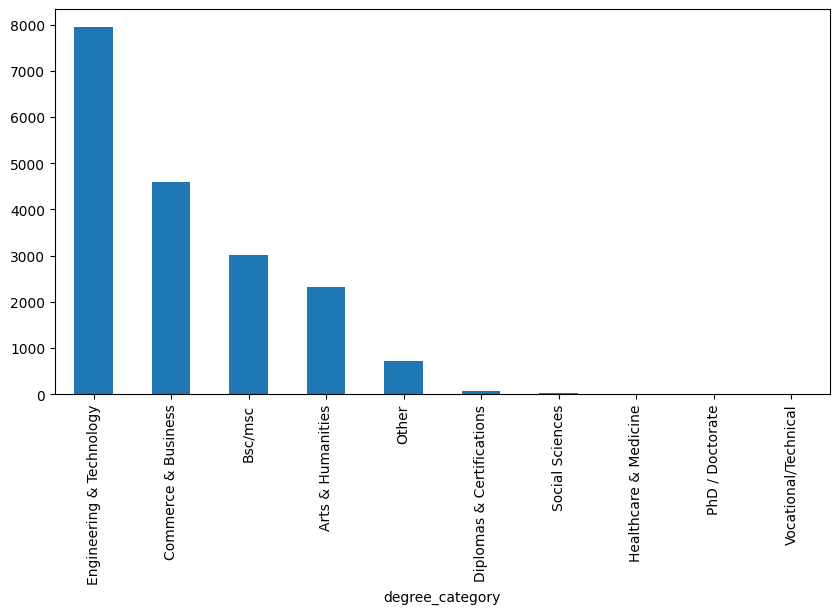

In [118]:
text_df['degree_category'].value_counts().head(15).plot(kind='bar', figsize=(10,5))
plt.show()

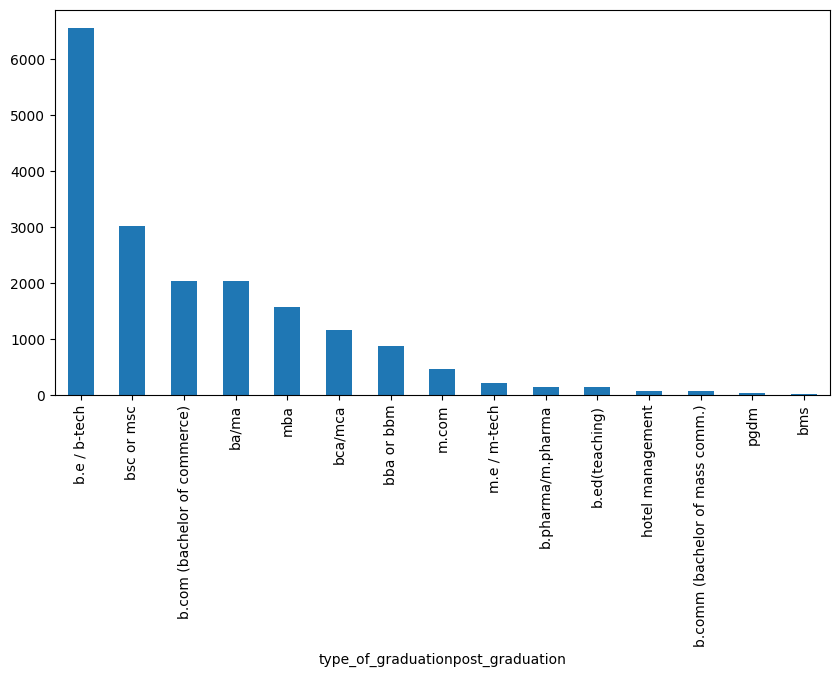

In [119]:
text_df['type_of_graduationpost_graduation'].value_counts().head(15).plot(kind='bar', figsize=(10,5))
plt.show()

In [120]:
text_df

,type_of_graduationpost_graduation,experienced_candidate_(nature_of_work),callpitch_elements_used_during_the_call_sales_scenario,father_reply,let_me_discuss_it_with_my_child,being_in_education_industry_be_selling_the_app,role_location_to_be_given_to_the_candidate,comments,redflags_comments_in_interview,degree_category
0,masters in data science,tech,Purpose of Call (Book a Counselling Session),Urgency using Time,None of the above,None of the above,Bangalore,"lipsa is 25 female from orissa, family bg - fa...",At least Graduated ( not 12th Pass or diploma ...,Engineering & Technology
1,bsc or msc,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...",Asking Questions,None of the above,Non chargeable session,Delhi,29 yo / female / unmarried / msc finance uk 20...,Not Rehire (CDT have not joined byjus in sales...,Bsc/msc
2,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name)",Urgency using Time,Decision Making: Major decision of child futur...,Non chargeable session,Chennai,nm,Not working currently and ready to join the R3...,Engineering & Technology
3,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...","Urgency using Time, Urgency using situation",None of the above,Value creation(Nothing comes for free),Delhi,final interview done 22yrs //uttarakhand // f...,Not Rehire (CDT have not joined byjus in sales...,Engineering & Technology
4,ba/ma,fresher(<6 months),None of the Above,Urgency by creating counsellor Hype,Anticipation of objection from child's end:,Value creation(Nothing comes for free),Bangalore,"aniket is 22 male from bhopal, ba grad 21, fam...","Age is below 32.11, At least Graduated ( not 1...",Arts & Humanities
...,...,...,...,...,...,...,...,...,...,...
18676,bsc or msc,sales numbers,"Introduction (Self Intro,Company Name), Purpos...",Urgency by creating counsellor Hype,Anticipation of objection from child's end:,Non chargeable session,Ghaziabad,select\ncs ghaziabad,Comfortable with the stipend & allowances duri...,Bsc/msc
18677,b.e / b-tech,working hours,"Introduction (Self Intro,Company Name), Purpos...","Urgency using Time, Urgency by creating counse...",Decision Making: Major decision of child futur...,"Non chargeable session, Value creation(Nothing...",Chandigarh,good candidate || cs chandigarh or panchkula o...,Not Interviewed in Byjus in sales role in last...,Engineering & Technology
18678,b.arc,sales numbers,"Introduction (Self Intro,Company Name), Need G...",Urgency using situation,Decision Making: Major decision of child futur...,Value creation(Nothing comes for free),Bangalore,"31,barc(2014), married, having exp as an sales...",Not Rehire (CDT have not joined byjus in sales...,Other
18679,b.e / b-tech,networking,"Introduction (Self Intro,Company Name), Purpos...",Urgency using situation,Asking questions:,Value creation(Nothing comes for free),Kannur,25yrs// father is privare employee// mother is...,Not Rehire (CDT have not joined byjus in sales...,Engineering & Technology


In [121]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18681 entries, 0 to 18680
Data columns (total 10 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   type_of_graduationpost_graduation                       18681 non-null  object
 1   experienced_candidate_(nature_of_work)                  18681 non-null  object
 2   callpitch_elements_used_during_the_call_sales_scenario  18681 non-null  object
 3   father_reply                                            18681 non-null  object
 4   let_me_discuss_it_with_my_child                         18681 non-null  object
 5   being_in_education_industry_be_selling_the_app          18681 non-null  object
 6   role_location_to_be_given_to_the_candidate              18681 non-null  object
 7   comments                                                18681 non-null  object
 8   redflags_comments_in_interview                

In [122]:
text_df.columns

Index(['type_of_graduationpost_graduation',
       'experienced_candidate_(nature_of_work)',
       'callpitch_elements_used_during_the_call_sales_scenario',
       'father_reply', 'let_me_discuss_it_with_my_child',
       'being_in_education_industry_be_selling_the_app',
       'role_location_to_be_given_to_the_candidate', 'comments',
       'redflags_comments_in_interview', 'degree_category'],
      dtype='object')

In [123]:
# creating 'meta_tag'
custom_object_tag = [
    #'type_of_graduationpost_graduation',
    'experienced_candidate_(nature_of_work)',
    #'callpitch_elements_used_during_the_call_sales_scenario',
    #'father_reply',
    #'let_me_discuss_it_with_my_child',
    #'being_in_education_industry_be_selling_the_app',
    'role_location_to_be_given_to_the_candidate',
    'comments',
    'redflags_comments_in_interview',
    #'degree_category'
]

# Create the 'meta_tag' column by concatenating selected columns
text_df['meta_tag'] = text_df[custom_object_tag].fillna('').astype(str).agg(' | '.join, axis=1)


In [124]:
text_df['degree_category'].value_counts()#####################################################

degree_category
Engineering & Technology     7942
Commerce & Business          4596
Bsc/msc                      3022
Arts & Humanities            2320
Other                         707
Diplomas & Certifications      62
Social Sciences                15
Healthcare & Medicine           9
PhD / Doctorate                 4
Vocational/Technical            4
Name: count, dtype: int64

In [125]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
text_df['degree_category'] = encoder.fit_transform(text_df['degree_category'])

In [126]:
text_df['experienced_candidate_(nature_of_work)'].value_counts().head(20)

experienced_candidate_(nature_of_work)
fresher(<6 months)                                          12070
sales numbers                                                1946
working hours                                                 749
call time                                                     286
no targets                                                    187
customer visits                                               170
teaching                                                      129
no targets                                                    119
call time, sales numbers, customer visits, working hours      102
sales numbers, customer visits                                 99
call time, sales numbers                                       78
non target                                                     76
operations                                                     58
core                                                           58
teaching                             

In [127]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18681 entries, 0 to 18680
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   type_of_graduationpost_graduation                       18681 non-null  object
 1   experienced_candidate_(nature_of_work)                  18681 non-null  object
 2   callpitch_elements_used_during_the_call_sales_scenario  18681 non-null  object
 3   father_reply                                            18681 non-null  object
 4   let_me_discuss_it_with_my_child                         18681 non-null  object
 5   being_in_education_industry_be_selling_the_app          18681 non-null  object
 6   role_location_to_be_given_to_the_candidate              18681 non-null  object
 7   comments                                                18681 non-null  object
 8   redflags_comments_in_interview                

In [128]:
text_df.head(5)

,type_of_graduationpost_graduation,experienced_candidate_(nature_of_work),callpitch_elements_used_during_the_call_sales_scenario,father_reply,let_me_discuss_it_with_my_child,being_in_education_industry_be_selling_the_app,role_location_to_be_given_to_the_candidate,comments,redflags_comments_in_interview,degree_category,meta_tag
0,masters in data science,tech,Purpose of Call (Book a Counselling Session),Urgency using Time,None of the above,None of the above,Bangalore,"lipsa is 25 female from orissa, family bg - fa...",At least Graduated ( not 12th Pass or diploma ...,4,tech | Bangalore | lipsa is 25 female from ori...
1,bsc or msc,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...",Asking Questions,None of the above,Non chargeable session,Delhi,29 yo / female / unmarried / msc finance uk 20...,Not Rehire (CDT have not joined byjus in sales...,1,fresher(<6 months) | Delhi | 29 yo / female /...
2,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name)",Urgency using Time,Decision Making: Major decision of child futur...,Non chargeable session,Chennai,nm,Not working currently and ready to join the R3...,4,fresher(<6 months) | Chennai | nm | Not worki...
3,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...","Urgency using Time, Urgency using situation",None of the above,Value creation(Nothing comes for free),Delhi,final interview done 22yrs //uttarakhand // f...,Not Rehire (CDT have not joined byjus in sales...,4,fresher(<6 months) | Delhi | final interview ...
4,ba/ma,fresher(<6 months),None of the Above,Urgency by creating counsellor Hype,Anticipation of objection from child's end:,Value creation(Nothing comes for free),Bangalore,"aniket is 22 male from bhopal, ba grad 21, fam...","Age is below 32.11, At least Graduated ( not 1...",0,fresher(<6 months) | Bangalore | aniket is 22 ...


In [129]:
text_df.loc[1, 'meta_tag']

"fresher(<6 months) | Delhi  | 29 yo / female / unmarried / msc finance uk 2022 / recently relocated to india just 20 days ago / odissa / father - doctor / bro - software engineer / pursuing internship in investment banking - ends in next week / worked as a teacher / good story teller - fluent in hindi and english - good energy / also prepared for upsc and gmat - purchased a course from byju's earlier / cracked gmat and got business school as well/asking ques in sales scenario - 2/5 | Not Rehire (CDT have not joined byjus in sales before), Not Interviewed in Byjus in sales role in last 90days, Laptop and WiFi are Available, Age is below 32.11, At least Graduated ( not 12th Pass or diploma or Final Year student), Willing to relocate at given location for SSP, Comfortable with the stipend & allowances during training, Not working currently and ready to join the R3 Process"

In [130]:
text_df.loc[0, 'meta_tag']

'tech | Bangalore | lipsa is 25 female from orissa, family bg - father - govt employee, mother - hw, currently residing in u.k - university of shephard - masters in data science exams over waiting for results, scenario - taking gaps engagement fine countering, overall avg one only from foreign university exams not done, skillset not upto mark, too hesitent abt stipend// reject | At least Graduated ( not 12th Pass or diploma or Final Year student)'

In [131]:
text_df.loc[2, 'meta_tag']

'fresher(<6 months) | Chennai  | nm | Not working currently and ready to join the R3 Process'

In [132]:
text_df.loc[3, 'meta_tag']

'fresher(<6 months) | Delhi  | final interview done  22yrs //uttarakhand // father is ex- navy employee// mother is housewife//2022 btech eee pass out // fresher // no-acquittance // performed well in extempore and ss //not interested in govt sector // as cdt performed well decent in hindi & english as well// empahtic yes -role acceptance// as cdt discussed with his father regarding this as well// 22nd nov //\n | Not Rehire (CDT have not joined byjus in sales before), Not Interviewed in Byjus in sales role in last 90days, Laptop and WiFi are Available, Age is below 32.11, At least Graduated ( not 12th Pass or diploma or Final Year student), Willing to relocate at given location for SSP, Comfortable with the stipend & allowances during training, Not working currently and ready to join the R3 Process'

In [133]:
import spacy
spacy.prefer_gpu()

nlp = spacy.load("en_core_web_sm")

def clean_text_pipe(texts):
    return [
        " ".join([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])
        for doc in nlp.pipe(texts, batch_size=100)
    ]

text_df['meta_tag_cleaned'] = clean_text_pipe(text_df['meta_tag'].astype(str))

In [134]:
text_df['meta_tag_cleaned']

0        tech Bangalore lipsa female orissa family bg f...
1        month Delhi yo female unmarried msc finance uk...
2        month Chennai nm work currently ready join pro...
3        month Delhi final interview father navy mother...
4        month Bangalore aniket male bhopal ba grad fam...
                               ...                        
18676    sale number Ghaziabad select cs ghaziabad Comf...
18677    work hour Chandigarh good candidate cs chandig...
18678    sale number Bangalore marry have exp sale tech...
18679    network Kannur father privare mother house wif...
18680    sale number Bangalore yo male married mba kott...
Name: meta_tag_cleaned, Length: 18681, dtype: object

In [135]:
text_df.loc[0, 'meta_tag_cleaned']

'tech Bangalore lipsa female orissa family bg father govt employee mother hw currently reside university shephard master datum science exam wait result scenario take gap engagement fine countering overall avg foreign university exam skillset upto mark hesitent abt reject Graduated Pass diploma Final Year student'

In [136]:
text_df.loc[1, 'meta_tag_cleaned']

'month Delhi yo female unmarried msc finance uk recently relocate india day ago odissa father doctor bro software engineer pursue internship investment banking end week work teacher good story teller fluent hindi english good energy prepare upsc gmat purchase course byju early crack gmat get business school ask que sale scenario Rehire CDT join byju sale interview Byjus sale role Laptop WiFi available Age Graduated Pass diploma Final Year student willing relocate give location SSP comfortable stipend allowance training work currently ready join process'

In [137]:
text_df.loc[2, 'meta_tag_cleaned']

'month Chennai nm work currently ready join process'

In [138]:
text_df.loc[3, 'meta_tag_cleaned']

'month Delhi final interview father navy mother btech eee pass fresher acquittance perform extempore ss interested govt sector cdt perform decent hindi english empahtic yes cdt discuss father nov Rehire CDT join byju sale interview Byjus sale role Laptop WiFi available Age Graduated Pass diploma Final Year student willing relocate give location SSP comfortable stipend allowance training work currently ready join process'

In [139]:
text_df

,type_of_graduationpost_graduation,experienced_candidate_(nature_of_work),callpitch_elements_used_during_the_call_sales_scenario,father_reply,let_me_discuss_it_with_my_child,being_in_education_industry_be_selling_the_app,role_location_to_be_given_to_the_candidate,comments,redflags_comments_in_interview,degree_category,meta_tag,meta_tag_cleaned
0,masters in data science,tech,Purpose of Call (Book a Counselling Session),Urgency using Time,None of the above,None of the above,Bangalore,"lipsa is 25 female from orissa, family bg - fa...",At least Graduated ( not 12th Pass or diploma ...,4,tech | Bangalore | lipsa is 25 female from ori...,tech Bangalore lipsa female orissa family bg f...
1,bsc or msc,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...",Asking Questions,None of the above,Non chargeable session,Delhi,29 yo / female / unmarried / msc finance uk 20...,Not Rehire (CDT have not joined byjus in sales...,1,fresher(<6 months) | Delhi | 29 yo / female /...,month Delhi yo female unmarried msc finance uk...
2,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name)",Urgency using Time,Decision Making: Major decision of child futur...,Non chargeable session,Chennai,nm,Not working currently and ready to join the R3...,4,fresher(<6 months) | Chennai | nm | Not worki...,month Chennai nm work currently ready join pro...
3,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...","Urgency using Time, Urgency using situation",None of the above,Value creation(Nothing comes for free),Delhi,final interview done 22yrs //uttarakhand // f...,Not Rehire (CDT have not joined byjus in sales...,4,fresher(<6 months) | Delhi | final interview ...,month Delhi final interview father navy mother...
4,ba/ma,fresher(<6 months),None of the Above,Urgency by creating counsellor Hype,Anticipation of objection from child's end:,Value creation(Nothing comes for free),Bangalore,"aniket is 22 male from bhopal, ba grad 21, fam...","Age is below 32.11, At least Graduated ( not 1...",0,fresher(<6 months) | Bangalore | aniket is 22 ...,month Bangalore aniket male bhopal ba grad fam...
...,...,...,...,...,...,...,...,...,...,...,...,...
18676,bsc or msc,sales numbers,"Introduction (Self Intro,Company Name), Purpos...",Urgency by creating counsellor Hype,Anticipation of objection from child's end:,Non chargeable session,Ghaziabad,select\ncs ghaziabad,Comfortable with the stipend & allowances duri...,1,sales numbers | Ghaziabad | select\ncs ghazia...,sale number Ghaziabad select cs ghaziabad Comf...
18677,b.e / b-tech,working hours,"Introduction (Self Intro,Company Name), Purpos...","Urgency using Time, Urgency by creating counse...",Decision Making: Major decision of child futur...,"Non chargeable session, Value creation(Nothing...",Chandigarh,good candidate || cs chandigarh or panchkula o...,Not Interviewed in Byjus in sales role in last...,4,working hours | Chandigarh | good candidate |...,work hour Chandigarh good candidate cs chandig...
18678,b.arc,sales numbers,"Introduction (Self Intro,Company Name), Need G...",Urgency using situation,Decision Making: Major decision of child futur...,Value creation(Nothing comes for free),Bangalore,"31,barc(2014), married, having exp as an sales...",Not Rehire (CDT have not joined byjus in sales...,6,"sales numbers | Bangalore | 31,barc(2014), mar...",sale number Bangalore marry have exp sale tech...
18679,b.e / b-tech,networking,"Introduction (Self Intro,Company Name), Purpos...",Urgency using situation,Asking questions:,Value creation(Nothing comes for free),Kannur,25yrs// father is privare employee// mother is...,Not Rehire (CDT have not joined byjus in sales...,4,networking | Kannur | 25yrs// father is priva...,network Kannur father privare mother house wif...


In [140]:
encoder = LabelEncoder()
text_df['meta_tag_encoded'] = encoder.fit_transform(text_df['meta_tag_cleaned'])

In [141]:
text_df['meta_tag_encoded']

0        16960
1         8519
2         5673
3         7160
4         2007
         ...  
18676    15232
18677    17940
18678    14368
18679    13468
18680    14465
Name: meta_tag_encoded, Length: 18681, dtype: int64

In [142]:
num_df.shape

(18681, 37)

In [143]:
num_df = num_df.join(text_df[['degree_category', 'meta_tag_encoded']])
num_df.shape

(18681, 39)

In [144]:
num_df.isnull().sum()

age                                                                                  0
gender                                                                               0
fluency_in_english_based_on_introduction                                             0
mother_tongue_influence                                                              0
has_acquaintance_in_company                                                          0
last_fixed_ctc_(lakhs)                                                               0
currently_employed                                                                   0
experienced_candidate__(experience_in_months)                                        0
what_was_the_type_of_role                                                            0
how_many_slides_candidate_have_submitted_in_ppt                                      0
candidate_is_willing_to_relocate                                                     0
confidence_based_on_introduction_(english)1

In [145]:
num_df.shape

(18681, 39)

In [146]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_df_scaled = scaler.fit_transform(num_df)
num_df_scaled = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns, index=num_df.index)

In [147]:
num_df_scaled.describe()  # Check mean ~0 and std ~1

,age,gender,fluency_in_english_based_on_introduction,mother_tongue_influence,has_acquaintance_in_company,last_fixed_ctc_(lakhs),currently_employed,experienced_candidate__(experience_in_months),what_was_the_type_of_role,how_many_slides_candidate_have_submitted_in_ppt,...,mode_of_interview_given_by_candidate_Mobile,candidate_status_Experienced in client facing(equal to or more than 6 months),candidate_status_Experienced in non client facing(equal to or more than 6 months),candidate_status_Fresher(only 2022 grad),candidate_status_Lateral(2021 and before with (less than 6 months) experience),role_acceptance_Emphatic Yes,role_acceptance_No,role_acceptance_Yes : Think and says yes.(Shows some hesitation),degree_category,meta_tag_encoded
count,1.868100e+04,18681.000000,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,...,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04
mean,-4.564270e-18,0.000000,7.835330e-17,6.085693e-18,1.825708e-17,2.053922e-17,3.347131e-17,3.499274e-17,2.966776e-17,2.434277e-17,...,-5.172839e-17,1.901779e-18,3.651416e-17,9.128540e-18,-1.521423e-18,-8.215686e-17,1.825708e-17,-5.933551e-17,-1.350263e-16,1.658351e-16
std,1.000027e+00,1.000027,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,...,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00
min,-1.538984e+00,-0.506749,-1.566748e+00,-5.441705e-01,-3.470364e-01,-6.489916e-01,-4.166258e-01,-5.890097e-01,-7.111922e-01,-2.099703e+00,...,-1.739064e+00,-4.741550e-01,-4.393041e-01,-9.227335e-01,-4.918563e-01,-1.414554e+00,-2.045165e-01,-6.438822e-01,-1.598628e+00,-1.733288e+00
25%,-4.637443e-01,-0.506749,-6.533659e-01,-5.441705e-01,-3.470364e-01,-6.489916e-01,-4.166258e-01,-5.890097e-01,-7.111922e-01,-1.601499e-01,...,5.750220e-01,-4.741550e-01,-4.393041e-01,-9.227335e-01,-4.918563e-01,-1.414554e+00,-2.045165e-01,-6.438822e-01,-9.846356e-01,-8.678055e-01
50%,-4.637443e-01,-0.506749,-6.533659e-01,-5.441705e-01,-3.470364e-01,-6.489916e-01,-4.166258e-01,-5.890097e-01,-7.111922e-01,-1.601499e-01,...,5.750220e-01,-4.741550e-01,-4.393041e-01,-9.227335e-01,-4.918563e-01,7.069365e-01,-2.045165e-01,-6.438822e-01,-3.706434e-01,-4.947490e-03
75%,6.114956e-01,-0.506749,1.173399e+00,-5.441705e-01,-3.470364e-01,8.301533e-01,-4.166258e-01,3.160522e-01,9.956142e-01,8.096267e-01,...,5.750220e-01,-4.741550e-01,-4.393041e-01,1.083737e+00,-4.918563e-01,7.069365e-01,-2.045165e-01,1.553079e+00,8.573410e-01,8.646604e-01
max,2.761975e+00,1.973362,1.173399e+00,1.837659e+00,2.881542e+00,4.528016e+00,2.400235e+00,2.578707e+00,2.702421e+00,2.749180e+00,...,5.750220e-01,2.109015e+00,2.276328e+00,1.083737e+00,2.033114e+00,7.069365e-01,4.889581e+00,1.553079e+00,3.927302e+00,1.737831e+00


In [148]:
num_df_scaled.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['age', 'gender', 'fluency_in_english_based_on_introduction',
       'mother_tongue_influence', 'has_acquaintance_in_company',
       'last_fixed_ctc_(lakhs)', 'currently_employed',
       'experienced_candidate__(experience_in_months)',
       'what_was_the_type_of_role',
       'how_many_slides_candidate_have_submitted_in_ppt',
       'candidate_is_willing_to_relocate',
       'confidence_based_on_introduction_(english)1',
       'confidence_based_on_the_topic_given__1',
       'confidence_based_on_the_ppt_question1',
       'confidence_based_on_the_sales_scenario1',
       'structured_thinking_(in_regional_only)1',
       'structured_thinking_based_on_the_ppt_question1',
       'structured_thinking(_call_pitch)1',
       'regional_fluency_based_on_the_topic_given__1',
       'regional_fluency_based_on_the_ppt_question1',
       'regional_fluency_based_on_the__sales_scenario1', 'confidence_score',
       'structured_thinking_score', 'region

In [149]:
num_df_scaled.shape

(18681, 39)

In [150]:
num_df_scaled = num_df_scaled.join(df[['interview_verdict']])
num_df_scaled.shape

(18681, 40)

In [151]:
# num_df_scaled.to_csv("byjus_data.csv", index=False)

In [152]:
# from IPython.display import FileLink
# FileLink("/kaggle/working/byjus_data.csv")

In [153]:
num_df_scaled.head(10)

,age,gender,fluency_in_english_based_on_introduction,mother_tongue_influence,has_acquaintance_in_company,last_fixed_ctc_(lakhs),currently_employed,experienced_candidate__(experience_in_months),what_was_the_type_of_role,how_many_slides_candidate_have_submitted_in_ppt,...,candidate_status_Experienced in client facing(equal to or more than 6 months),candidate_status_Experienced in non client facing(equal to or more than 6 months),candidate_status_Fresher(only 2022 grad),candidate_status_Lateral(2021 and before with (less than 6 months) experience),role_acceptance_Emphatic Yes,role_acceptance_No,role_acceptance_Yes : Think and says yes.(Shows some hesitation),degree_category,meta_tag_encoded,interview_verdict
0,0.611496,1.973362,1.173399,-0.544171,-0.347036,3.048871,-0.416626,-0.136479,-0.711192,2.749180,...,-0.474155,2.276328,-0.922733,-0.491856,-1.414554,-0.204517,1.553079,0.857341,1.446649,0
1,1.686735,1.973362,1.173399,-0.544171,-0.347036,-0.648992,-0.416626,-0.589010,-0.711192,-0.160150,...,-0.474155,-0.439304,-0.922733,2.033114,0.706936,-0.204517,-0.643882,-0.984636,-0.136007,0
2,0.611496,1.973362,1.173399,1.837659,2.881542,-0.648992,2.400235,-0.589010,0.995614,1.779403,...,-0.474155,-0.439304,1.083737,-0.491856,0.706936,-0.204517,-0.643882,0.857341,-0.669622,1
3,-0.463744,-0.506749,1.173399,-0.544171,-0.347036,-0.648992,-0.416626,-0.589010,-0.711192,1.779403,...,-0.474155,-0.439304,1.083737,-0.491856,0.706936,-0.204517,-0.643882,0.857341,-0.390815,1
4,-0.463744,-0.506749,-0.653366,-0.544171,-0.347036,-0.648992,-0.416626,-0.589010,-0.711192,-1.129927,...,-0.474155,-0.439304,1.083737,-0.491856,-1.414554,-0.204517,1.553079,-1.598628,-1.356983,1
5,-0.463744,-0.506749,-1.566748,-0.544171,-0.347036,0.830153,-0.416626,-0.589010,-0.711192,-2.099703,...,-0.474155,-0.439304,-0.922733,2.033114,-1.414554,-0.204517,1.553079,-1.598628,-0.340753,0
6,-0.463744,1.973362,1.173399,-0.544171,2.881542,-0.648992,-0.416626,-0.589010,-0.711192,-0.160150,...,-0.474155,-0.439304,-0.922733,2.033114,0.706936,-0.204517,-0.643882,2.085325,-1.266985,1
7,0.611496,-0.506749,-1.566748,-0.544171,-0.347036,-0.648992,-0.416626,-0.589010,-0.711192,-0.160150,...,-0.474155,-0.439304,1.083737,-0.491856,-1.414554,-0.204517,1.553079,0.857341,-1.108551,0
8,-0.463744,-0.506749,-0.653366,1.837659,-0.347036,-0.648992,-0.416626,-0.589010,-0.711192,-2.099703,...,-0.474155,-0.439304,-0.922733,2.033114,0.706936,-0.204517,-0.643882,0.857341,-0.310191,0
9,0.611496,-0.506749,-0.653366,-0.544171,-0.347036,1.569726,-0.416626,0.316052,0.995614,0.809627,...,2.109015,-0.439304,-0.922733,-0.491856,0.706936,-0.204517,-0.643882,-0.370643,0.937221,1


# Accuracy checking 

In [154]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [155]:
X = num_df_scaled.drop(columns=['interview_verdict'])
y = num_df_scaled['interview_verdict']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [156]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Create a pipeline with SMOTE, scaling, and model
pipeline = Pipeline([('smote', smote),
                     ('model', model)
                    ])

# Train the model
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Output the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       873
           1       0.91      0.93      0.92      2864

    accuracy                           0.88      3737
   macro avg       0.84      0.82      0.83      3737
weighted avg       0.88      0.88      0.88      3737



In [157]:
len(X), len(y), len(X_train), len(y_train), len(X_test), len(y_test)

(18681, 18681, 14944, 14944, 3737, 3737)

In [158]:
# Train Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred)*100)

# Classification Report
print(classification_report(y_test, y_pred))


Accuracy: 87.95825528498796
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       873
           1       0.90      0.94      0.92      2864

    accuracy                           0.88      3737
   macro avg       0.84      0.81      0.82      3737
weighted avg       0.88      0.88      0.88      3737



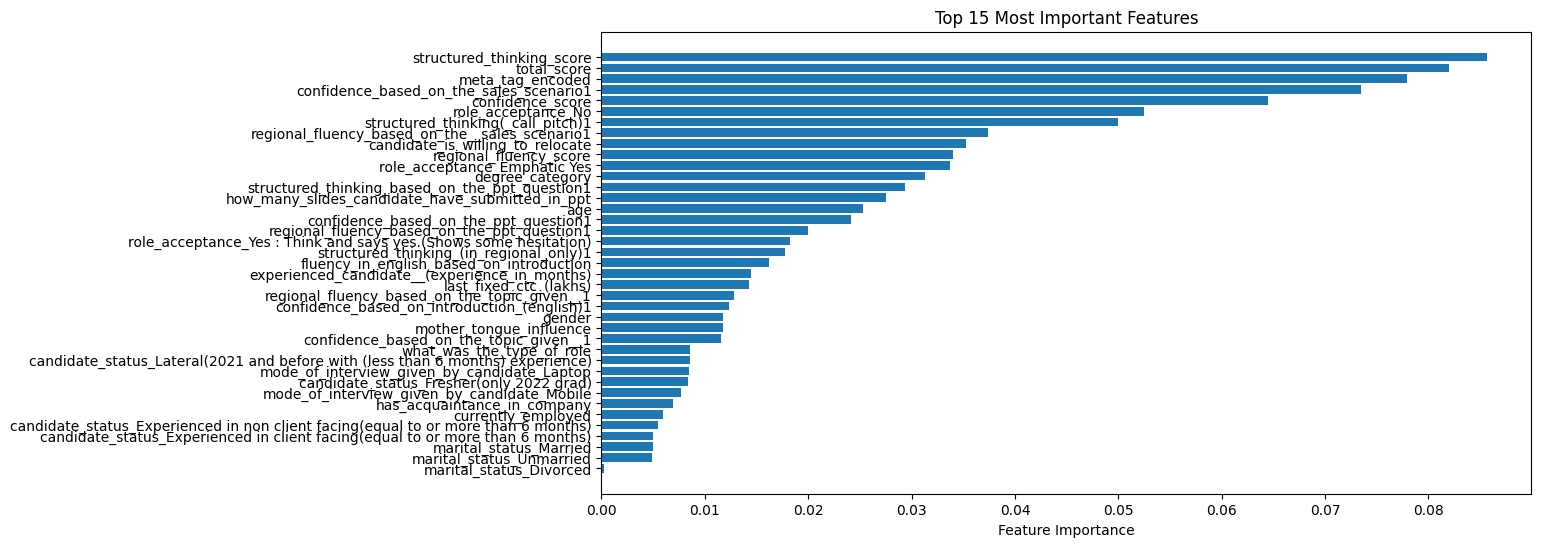

In [159]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(12, 6))
plt.barh(X.columns[sorted_idx][:40], feature_importance[sorted_idx][:40])
plt.xlabel("Feature Importance")
plt.title("Top 15 Most Important Features")
plt.gca().invert_yaxis()
plt.show()

In [160]:
# dataset and Dataloader

In [161]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)  # 🔹 Float for BCEWithLogitsLoss
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)  # 🔹 Float for BCEWithLogitsLoss

In [162]:
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [163]:
len(train_loader), len(test_loader), len(train_dataset), len(test_dataset)

(467, 117, 14944, 3737)

In [164]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [165]:
# Initialize model
input_size = X_train.shape[1]
model = MLP(input_size)

# Define Loss and Optimizer
criterion = nn.BCEWithLogitsLoss()  # 🔹 Binary Classification Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

MLP(
  (fc1): Linear(in_features=39, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)

In [166]:
num_epochs = 10
train_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device).unsqueeze(1)  # Add extra dim for BCE loss

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

Epoch [1/10], Loss: 0.3290
Epoch [2/10], Loss: 0.2937
Epoch [3/10], Loss: 0.2891
Epoch [4/10], Loss: 0.2854
Epoch [5/10], Loss: 0.2809
Epoch [6/10], Loss: 0.2783
Epoch [7/10], Loss: 0.2746
Epoch [8/10], Loss: 0.2710
Epoch [9/10], Loss: 0.2673
Epoch [10/10], Loss: 0.2620


In [167]:
num_epochs = 50

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device).unsqueeze(1)  # BCE Loss needs shape (batch,1)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Compute Training Accuracy
        predicted = torch.sigmoid(outputs) > 0.5  # Convert logits to binary labels
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc*100)

    # Testing Phase
    model.eval()
    test_running_loss, correct, total = 0.0, 0, 0

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device).unsqueeze(1)

            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            test_running_loss += loss.item()

            # Compute Test Accuracy
            predicted = torch.sigmoid(outputs) > 0.5
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)

    test_loss = test_running_loss / len(test_loader)
    test_acc = correct / total
    test_losses.append(test_loss)
    test_accuracies.append(test_acc*100)

    # Print Metrics for Each Epoch
    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {train_loss:.3f}, Train Acc: {train_acc *100 :.3f} | "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc *100 :.3f}")

Epoch [1/50] | Train Loss: 0.257, Train Acc: 89.735 | Test Loss: 0.3085, Test Acc: 87.075
Epoch [2/50] | Train Loss: 0.254, Train Acc: 89.869 | Test Loss: 0.3051, Test Acc: 87.370
Epoch [3/50] | Train Loss: 0.245, Train Acc: 90.210 | Test Loss: 0.3139, Test Acc: 87.075
Epoch [4/50] | Train Loss: 0.238, Train Acc: 90.404 | Test Loss: 0.3102, Test Acc: 87.637
Epoch [5/50] | Train Loss: 0.231, Train Acc: 90.592 | Test Loss: 0.3224, Test Acc: 86.861
Epoch [6/50] | Train Loss: 0.222, Train Acc: 91.080 | Test Loss: 0.3452, Test Acc: 87.048
Epoch [7/50] | Train Loss: 0.213, Train Acc: 91.401 | Test Loss: 0.3413, Test Acc: 86.513
Epoch [8/50] | Train Loss: 0.207, Train Acc: 91.629 | Test Loss: 0.3510, Test Acc: 86.941
Epoch [9/50] | Train Loss: 0.199, Train Acc: 92.171 | Test Loss: 0.3880, Test Acc: 86.620
Epoch [10/50] | Train Loss: 0.189, Train Acc: 92.552 | Test Loss: 0.3883, Test Acc: 86.594
Epoch [11/50] | Train Loss: 0.181, Train Acc: 92.786 | Test Loss: 0.3991, Test Acc: 86.486
Epoch [1

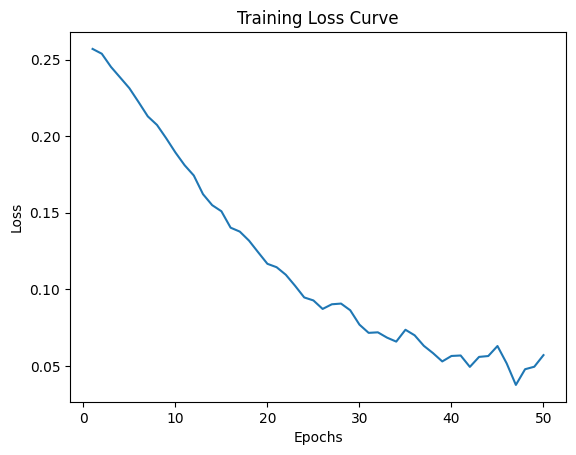

In [168]:
# Plot Training Loss
plt.plot(range(1, num_epochs + 1), train_losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

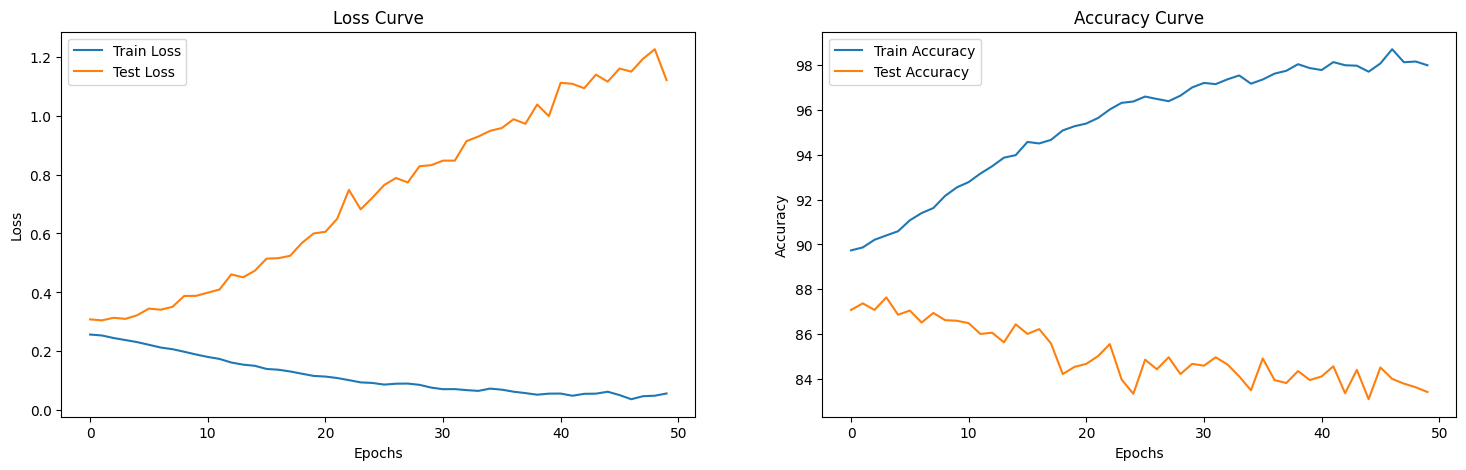

In [169]:
# Plot Training & Test Loss
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

# Plot Training & Test Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(test_accuracies, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

plt.show()